In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinic_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
scc_df=mouse_df.merge(clinic_df, on="Mouse ID")

# Display the data table for preview
scc_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
scc_group=scc_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
scc_mean=pd.DataFrame(scc_group.mean())
# Preview DataFrame
scc_mean.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Convert to DataFrame
scc_sem=pd.DataFrame(scc_group.sem())
scc_sem=scc_sem.drop(columns="Mouse ID")

# Preview DataFrame
scc_sem.head()


Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vols=scc_mean["Tumor Volume (mm3)"].unstack(level=0)
sem_tumor_vols=scc_sem["Tumor Volume (mm3)"].unstack(level=0)
# Preview that Reformatting worked
mean_tumor_vols.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


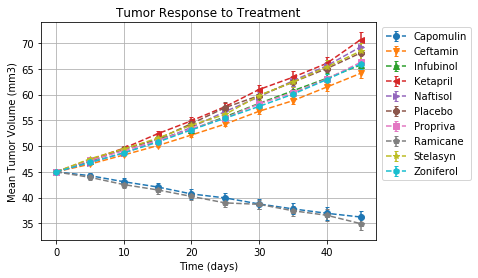

In [5]:
# Generate the Plot (with Error Bars)
filled_markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
drugs=mean_tumor_vols.columns
times=sem_tumor_vols["Placebo"].keys()
# plt.plot(mean_tumor_vols)
# mtp.markers.MarkerStyle(marker=filled_markers)
for i in range (10):
#     plt.plot(mean_tumor_vols[drugs[i]],marker=filled_markers[i])
    plt.errorbar(times,mean_tumor_vols[drugs[i]],fmt=('--'+filled_markers[i]),yerr=sem_tumor_vols[drugs[i]],capsize=2)

plt.title("Tumor Response to Treatment")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid()
lgd = plt.legend(bbox_to_anchor=(1.3, 1))
# Save the Figure
plt.savefig("figures/Tumor_Response_to_Treatment.png",bbox_extra_artists=(lgd,),bbox_inches='tight')


## Metastatic Response to Treatment

In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites=scc_mean["Metastatic Sites"].unstack(level=0)
sem_met_sites=scc_sem["Metastatic Sites"].unstack(level=0)

# Preview that Reformatting worked
mean_met_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


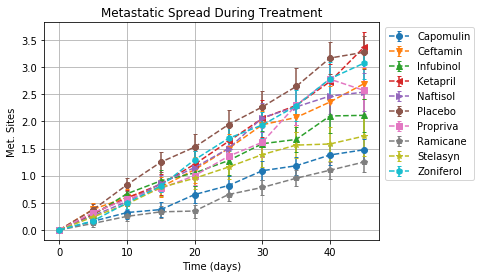

In [7]:
# Generate the Plot (with Error Bars)
filled_markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
drugs=mean_met_sites.columns
times=sem_met_sites["Placebo"].keys()
# plt.plot(mean_tumor_vols)
# mtp.markers.MarkerStyle(marker=filled_markers)
for i in range (10):
#     plt.plot(mean_tumor_vols[drugs[i]],marker=filled_markers[i])
    plt.errorbar(times,mean_met_sites[drugs[i]],fmt=('--'+filled_markers[i]),yerr=sem_met_sites[drugs[i]],capsize=2)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time (days)")
plt.grid()
lgd = plt.legend(bbox_to_anchor=(1.3, 1))
# Save the Figure
plt.savefig("figures/Metastatic_Spread_During_Treatment.png",bbox_extra_artists=(lgd,),bbox_inches='tight')


## Survival Rates

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
scc_count=pd.DataFrame(scc_group["Mouse ID"].count())
scc_count=scc_count.rename(columns={"Mouse ID":"Mouse Count"})
# Convert to DataFrame
scc_count.head()
# Preview DataFrame


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count=scc_count["Mouse Count"].unstack(level=0)
mouse_surv=mouse_count/mouse_count.loc[0]*100
# Preview the Data Frame
mouse_surv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


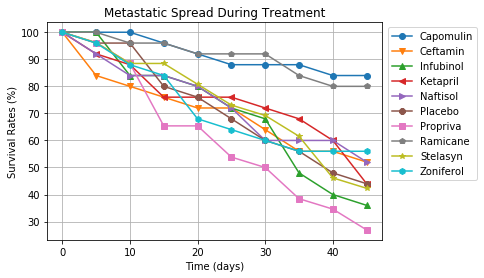

In [10]:
# Generate the Plot (with Error Bars)
filled_markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
drugs=mouse_surv.columns
times=mouse_surv["Placebo"].keys()
# plt.plot(mean_tumor_vols)
# mtp.markers.MarkerStyle(marker=filled_markers)
for i in range (10):
    plt.plot(mouse_surv[drugs[i]],marker=filled_markers[i])
#     plt.errorbar(times,mean_met_sites[drugs[i]],fmt=('--'+filled_markers[i]),yerr=sem_met_sites[drugs[i]],capsize=2)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Survival Rates (%)")
plt.xlabel("Time (days)")
plt.grid()
lgd = plt.legend(bbox_to_anchor=(1.3, 1))
# Save the Figure
plt.savefig("figures/Survival_During_Treatment.png",bbox_extra_artists=(lgd,),bbox_inches='tight')
plt.show()

## Summary Bar Graph

In [11]:
# Calculate the percent changes for each drug
pct_change=(mean_tumor_vols.loc[45]-mean_tumor_vols.loc[0])/mean_tumor_vols.loc[0]*100
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

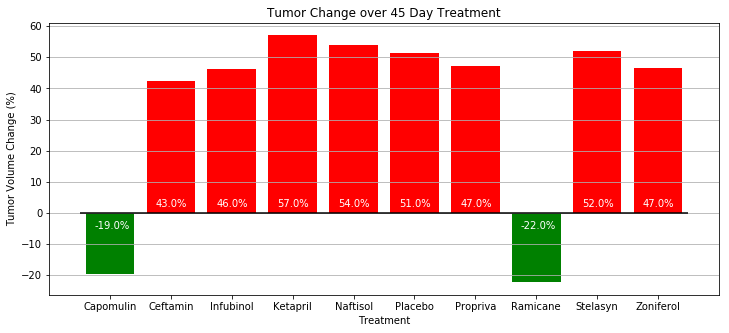

In [12]:
# Store all Relevant Percent Changes into a Tuple
drug_changes=(pct_change)

# Splice the data between passing and failing drugs
passed=drug_changes[drug_changes <0 ]
failed=drug_changes[drug_changes >0 ]
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls
drugs=drug_changes.keys()
plt.figure(figsize=(12,5))
for i in range (10):
    if drug_changes[i]<0:
        c="g"
        y=-5
    else:
        c="r"
        y=2
    pct=str(drug_changes[i].round())+"%"
    plt.bar(drugs[i],drug_changes[i],color=c)
    plt.text(i-0.25,y,pct,color="w")
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")
plt.xlabel("Treatment")
plt.grid(axis="y")

plt.hlines(0, -0.5, 9.5, alpha=1)
# Save the Figure
plt.savefig("figures/Tumor Change over 45 Day Treatment.png")
plt.show()